<a href="https://colab.research.google.com/github/thelostnewspaper/fish_cryptogrphy/blob/main/fish_cryptography.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opencv-python-headless cryptography

In [2]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from cryptography.hazmat.primitives.kdf.pbkdf2 import PBKDF2HMAC
from cryptography.hazmat.primitives import hashes
from cryptography.hazmat.backends import default_backend

In [3]:
def generate_key(random_bits):
    password = random_bits[:32]  # Use the first 32 bits for the password
    salt = os.urandom(16)  # Generate a random salt
    kdf = PBKDF2HMAC(
        algorithm=hashes.SHA256(),
        length=32,  # Length of the key
        salt=salt,
        iterations=100000,
        backend=default_backend()
    )
    key = kdf.derive(password.encode())
    return key

In [4]:
def process_video(video_path):
    cap = cv2.VideoCapture(video_path)

    # Check if the video opened successfully
    if not cap.isOpened():
        print("Error opening video file")
        return None

    random_bits = ""

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Convert to grayscale
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Apply binary threshold
        _, binary_frame = cv2.threshold(gray_frame, 127, 255, cv2.THRESH_BINARY)

        # Extract random bits from the binary frame
        random_bits += ''.join(format(x, '08b') for x in binary_frame.flatten())

        # Display the frames using Matplotlib
        plt.figure(figsize=(12, 4))

        plt.subplot(1, 3, 1)
        plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        plt.title('Original Frame')
        plt.axis('off')

        plt.subplot(1, 3, 2)
        plt.imshow(gray_frame, cmap='gray')
        plt.title('Grayscale Frame')
        plt.axis('off')

        plt.subplot(1, 3, 3)
        plt.imshow(binary_frame, cmap='gray')
        plt.title('Binary Frame')
        plt.axis('off')

        plt.show()

        # Optional: Add a break to limit the number of frames displayed
        # Uncomment the next line to display only the first 10 frames
        # if len(random_bits) > 800: break

    cap.release()
    return random_bits

In [5]:
def main():
    video_path = '/content/fish/videoplayback.mp4'  # Adjust the path accordingly
    random_bits = process_video(video_path)

    if random_bits:
        # Generate a cryptographic key from the random bits
        key = generate_key(random_bits)
        print(f'Generated Cryptographic Key: {key.hex()}')

In [6]:
if __name__ == "__main__":
    main()

Error opening video file


In [7]:
from google.colab import files

# Upload the video file
uploaded = files.upload()

KeyboardInterrupt: 

In [8]:
ipd.Video('/content/fish/videoplayback.mp4', width=700)

NameError: name 'ipd' is not defined

In [13]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

from glob import glob

import IPython.display as ipd
from tqdm import tqdm

import subprocess

plt.style.use('ggplot')

In [14]:
cap = cv2.VideoCapture('/content/fish/videoplayback.mp4')

In [16]:
frame_count = cap.get(cv2.CAP_PROP_FRAME_COUNT)

In [18]:
import cv2

# Load the video
video_path = '/content/fish/videoplayback.mp4'  # Adjust the path accordingly
cap = cv2.VideoCapture(video_path)

# Check if the video opened successfully
if not cap.isOpened():
    print("Error opening video file")
else:
    # Get the total number of frames
    frame_count = cap.get(cv2.CAP_PROP_FRAME_COUNT)
    print(f'Total number of frames: {frame_count}')

    # Get the height and width of the video frames
    height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
    width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
    print(f'Height: {height}, Width: {width}')

# Release the video capture object
cap.release()

Total number of frames: 7458.0
Height: 360.0, Width: 640.0


In [20]:
fps = cap.get(cv2.CAP_PROP_FPS)
print(f'FPS : {fps:0.2f}')

FPS : 0.00


In [21]:
cap.release()

In [22]:
cap = cv2.VideoCapture('/content/fish/videoplayback.mp4')
ret, img = cap.read()
print(f'Returned {ret} and img of shape {img.shape}')

Returned True and img of shape (360, 640, 3)


In [23]:
def display_cv2_img(img, figsize=(10, 10)):
    img_ = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    fig, ax = plt.subplots(figsize=figsize)
    ax.imshow(img_)
    ax.axis("off")

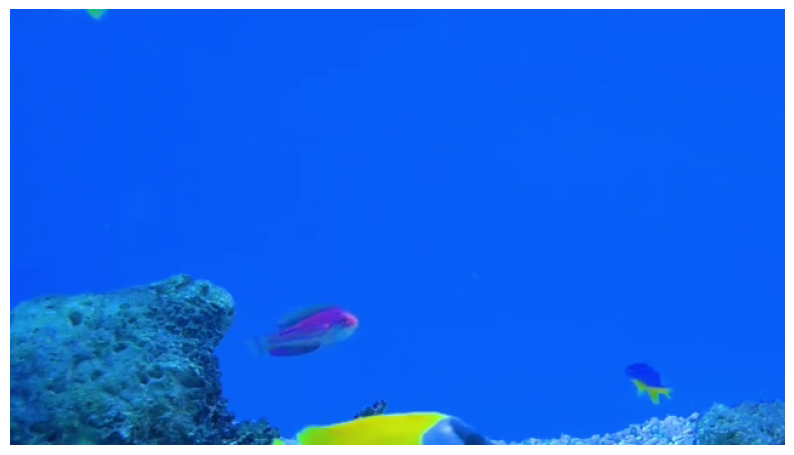

In [24]:
display_cv2_img(img)

In [25]:
cap.release()

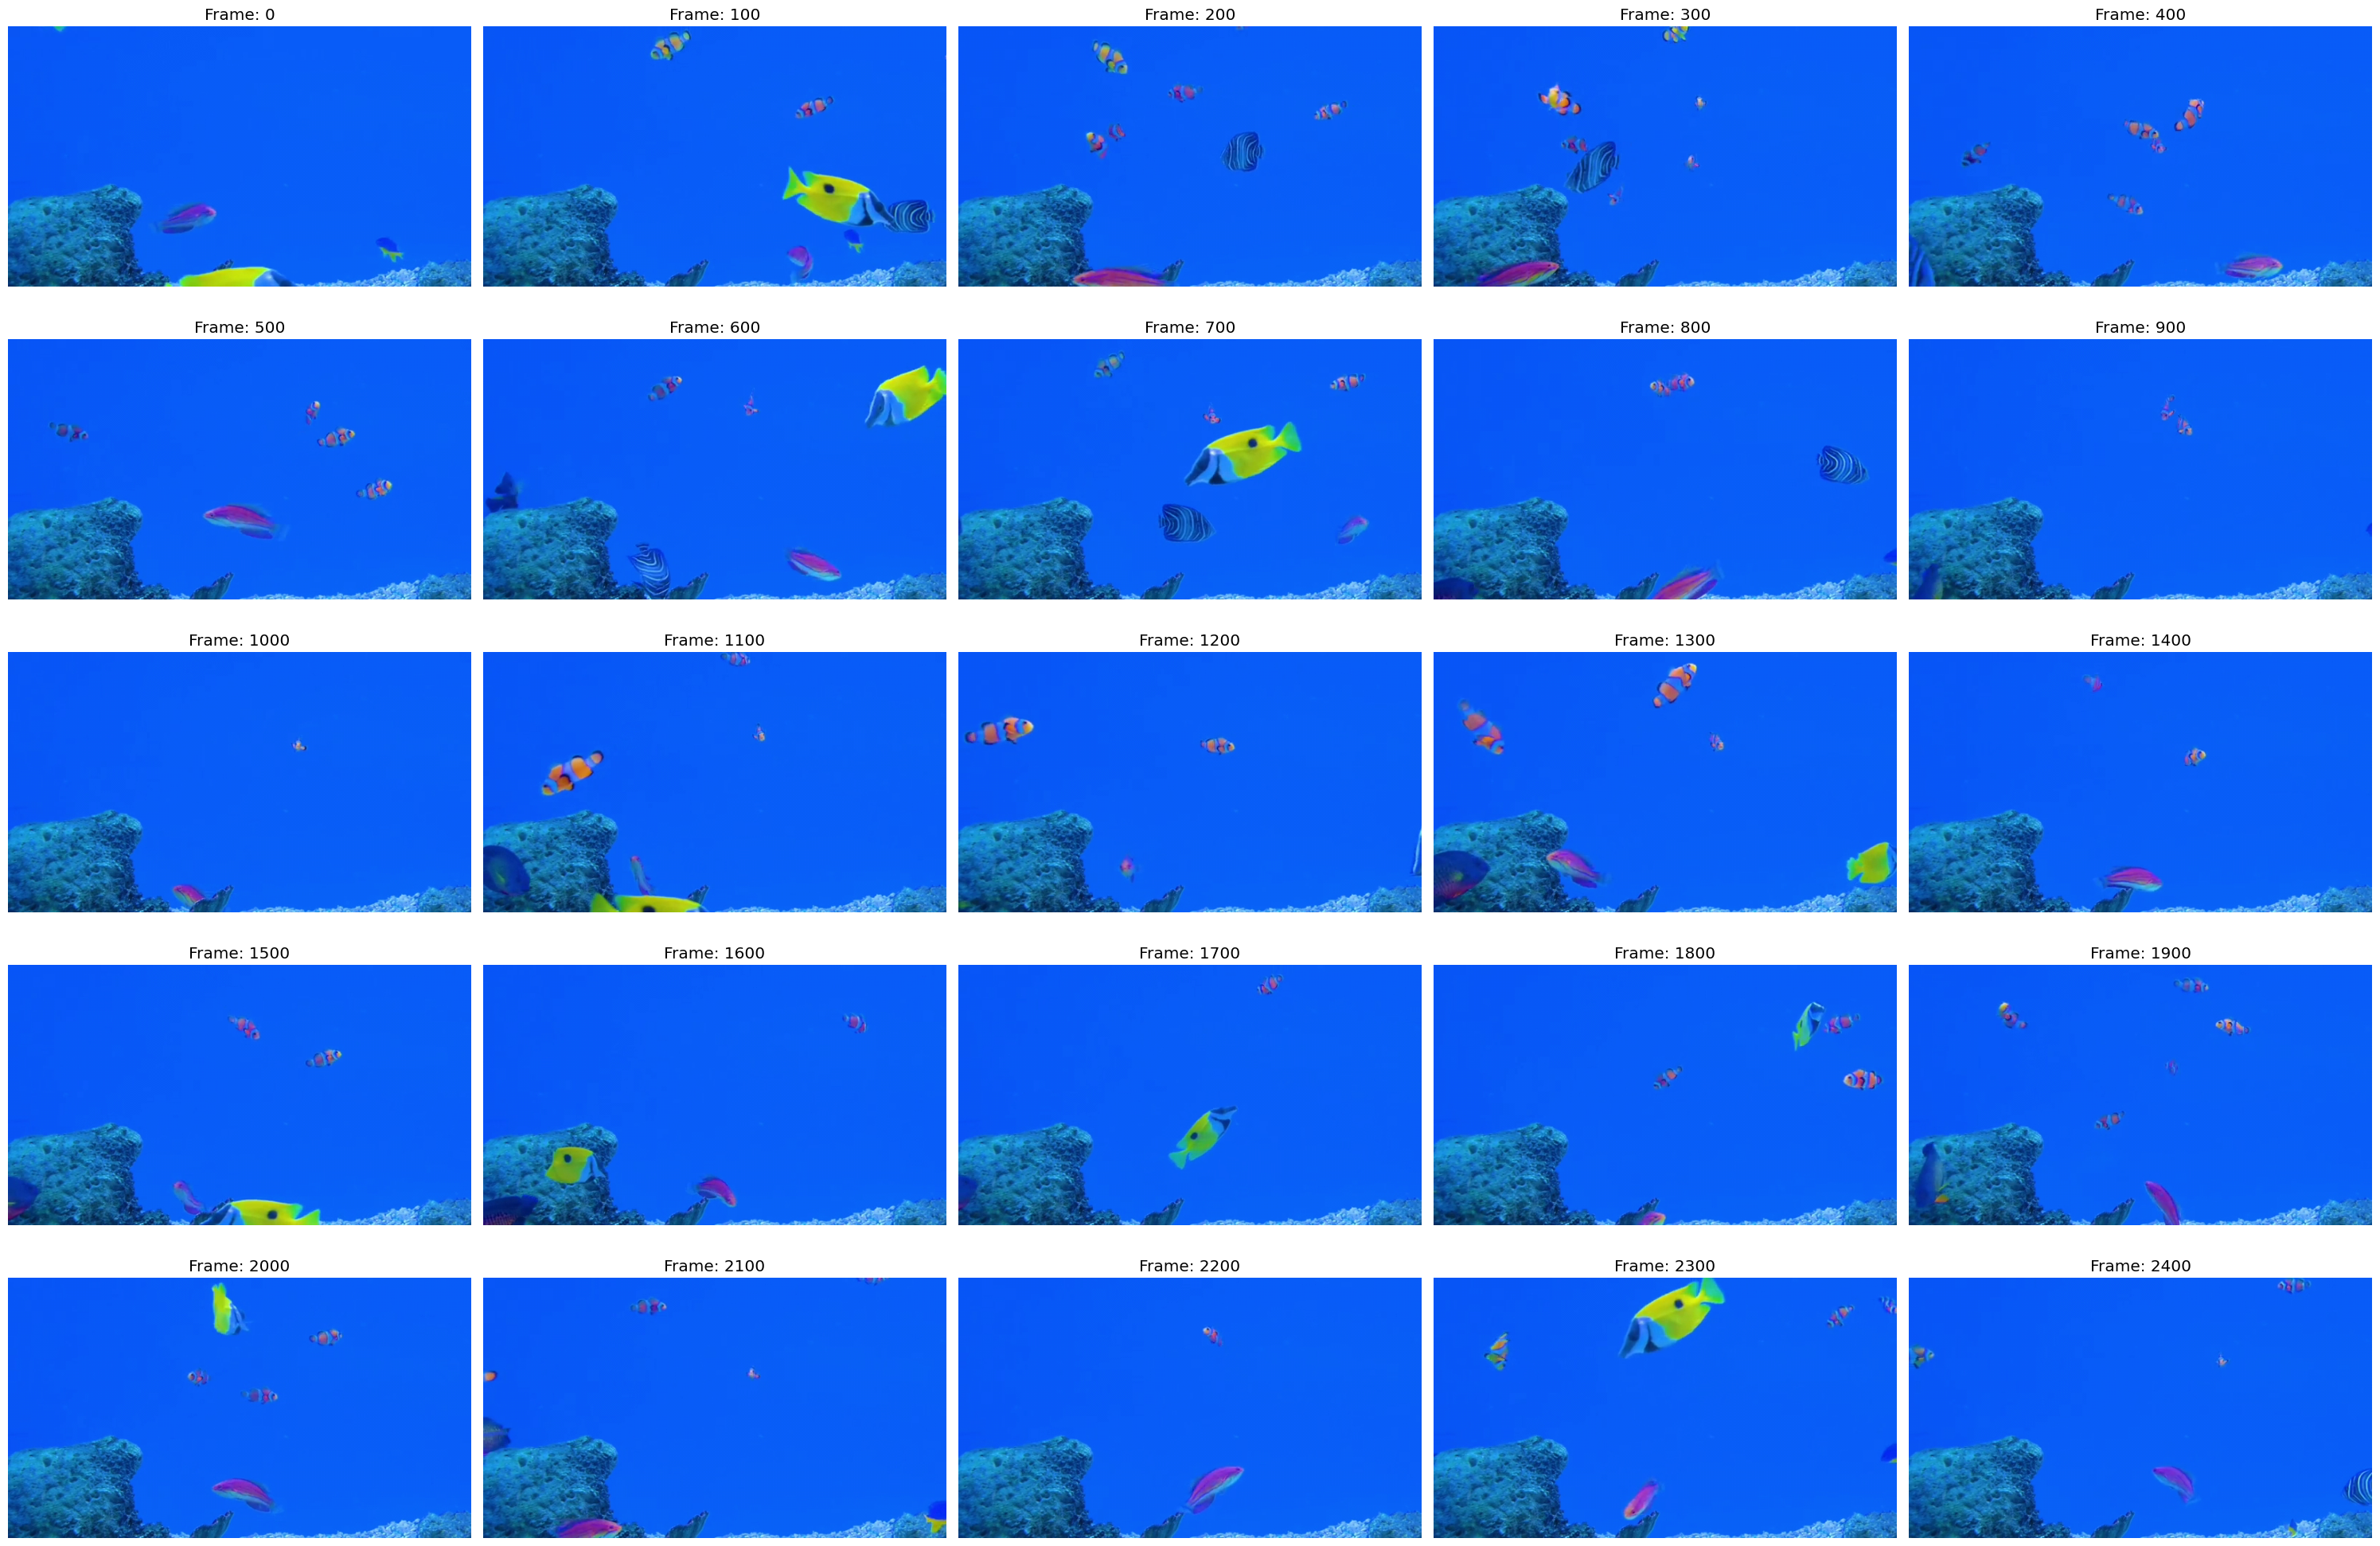

In [28]:
import cv2
import matplotlib.pyplot as plt

# Create a 5x5 grid for displaying frames
fig, axs = plt.subplots(5, 5, figsize=(30, 20))
axs = axs.flatten()

# Load the video
cap = cv2.VideoCapture("/content/fish/videoplayback.mp4")

# Get the total number of frames
n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

img_idx = 0
for frame in range(n_frames):
    ret, img = cap.read()
    if not ret:
        break
    if frame % 100 == 0:  # Display every 100th frame
        if img_idx < len(axs):  # Check if img_idx is within bounds
            axs[img_idx].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            axs[img_idx].set_title(f'Frame: {frame}')
            axs[img_idx].axis('off')
            img_idx += 1

plt.tight_layout()
plt.show()
cap.release()

Total number of frames: 7458


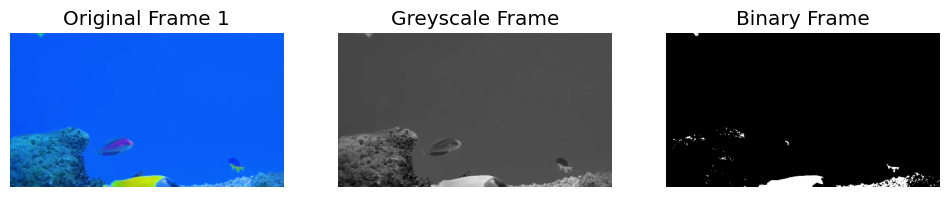

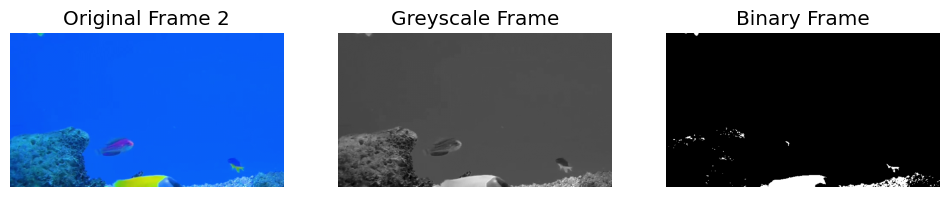

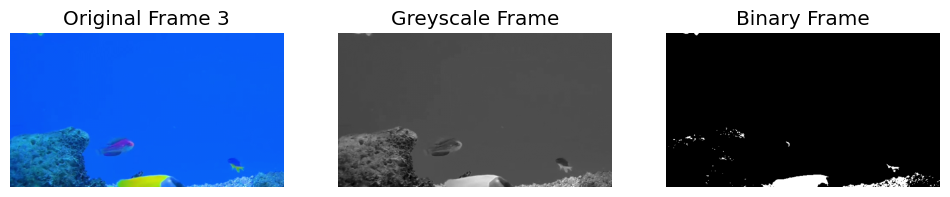

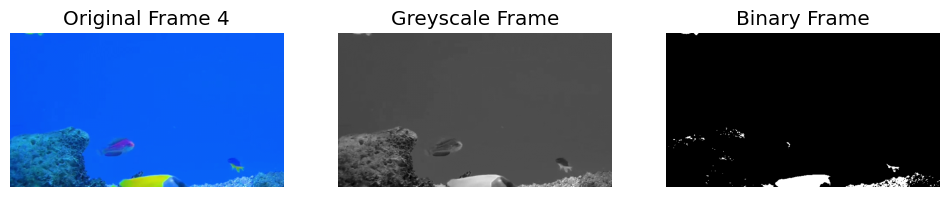

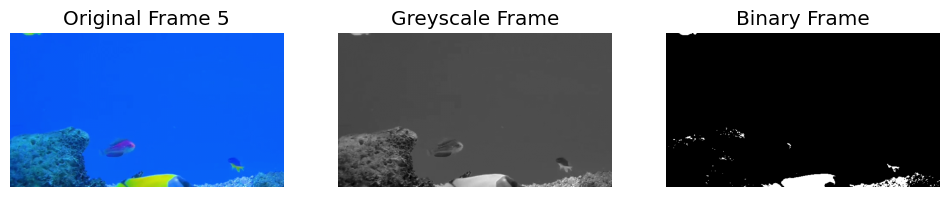

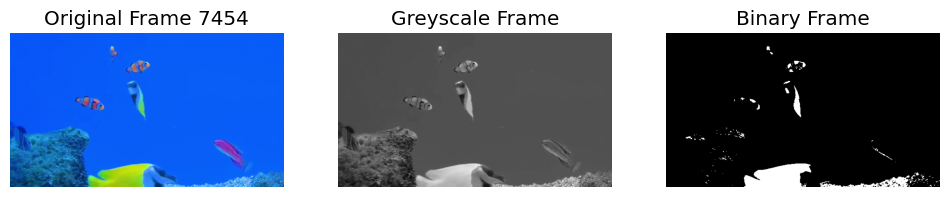

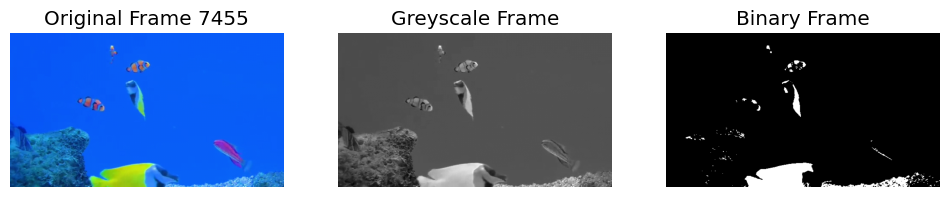

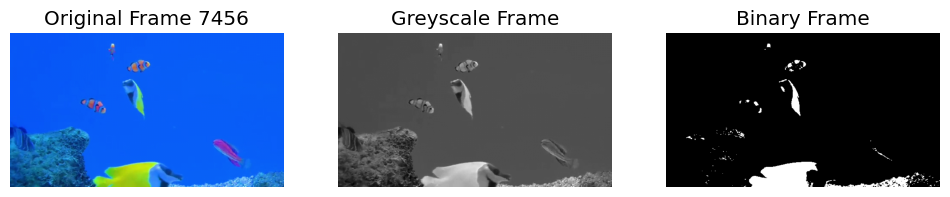

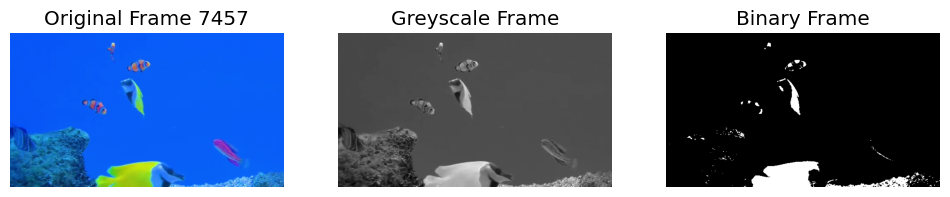

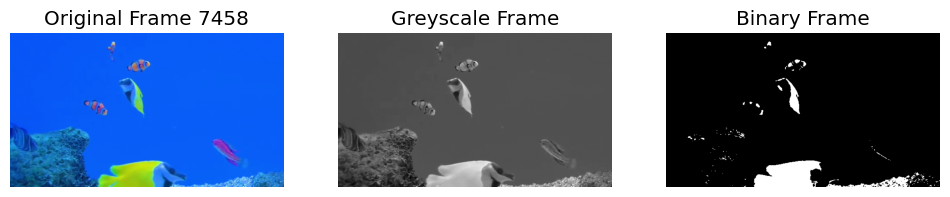

Generated Cryptographic Key: ed1eefd40c11e34d462df4a7de0cc970a27790f66db13662e81e709716e5da1b
Ciphertext: 1e107a569c452368afd986b66293bbf8926f0e5fa77f628f91
Decrypted Message: This is a secret message.


In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from cryptography.hazmat.primitives.kdf.pbkdf2 import PBKDF2HMAC
from cryptography.hazmat.primitives import hashes
from cryptography.hazmat.backends import default_backend
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes

# Load the video
cap = cv2.VideoCapture("/content/fish/videoplayback.mp4")

# Get the total number of frames
n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print(f'Total number of frames: {n_frames}')

# Specify how many frames to display from the head and tail
num_frames_to_display = 5  # Change this to display more or fewer frames

# Initialize a list to store randomness
randomness_list = []

# Display head frames
for frame in range(num_frames_to_display):
    ret, frame_img = cap.read()
    if not ret:
        break

    # Convert to greyscale
    grey_frame = cv2.cvtColor(frame_img, cv2.COLOR_BGR2GRAY)

    # Convert to binary
    _, binary_frame = cv2.threshold(grey_frame, 128, 255, cv2.THRESH_BINARY)

    # Flatten the binary frame to extract randomness
    randomness = binary_frame.flatten() // 255  # Convert to 0s and 1s
    randomness_list.append(randomness)

    # Visualize the frames
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(frame_img, cv2.COLOR_BGR2RGB))
    plt.title(f'Original Frame {frame + 1}')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(grey_frame, cmap='gray')
    plt.title('Greyscale Frame')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(binary_frame, cmap='gray')
    plt.title('Binary Frame')
    plt.axis('off')

    plt.show()

# Move to the last few frames
cap.set(cv2.CAP_PROP_POS_FRAMES, max(0, n_frames - num_frames_to_display))

# Display tail frames
for frame in range(num_frames_to_display):
    ret, frame_img = cap.read()
    if not ret:
        break

    # Convert to greyscale
    grey_frame = cv2.cvtColor(frame_img, cv2.COLOR_BGR2GRAY)

    # Convert to binary
    _, binary_frame = cv2.threshold(grey_frame, 128, 255, cv2.THRESH_BINARY)

    # Flatten the binary frame to extract randomness
    randomness = binary_frame.flatten() // 255  # Convert to 0s and 1s
    randomness_list.append(randomness)

    # Visualize the frames
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(frame_img, cv2.COLOR_BGR2RGB))
    plt.title(f'Original Frame {n_frames - num_frames_to_display + frame + 1}')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(grey_frame, cmap='gray')
    plt.title('Greyscale Frame')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(binary_frame, cmap='gray')
    plt.title('Binary Frame')
    plt.axis('off')

    plt.show()

cap.release()

# Combine all randomness into a single array
combined_randomness = np.concatenate(randomness_list)

# Derive a cryptographic key from the randomness
def derive_key(random_bits):
    # Use the first 32 bits for the password
    password = random_bits[:32].tobytes()  # Convert to bytes
    salt = os.urandom(16)  # Generate a random salt
    kdf = PBKDF2HMAC(
        algorithm=hashes.SHA256(),
        length=32,  # Length of the key
        salt=salt,
        iterations=100000,
        backend=default_backend()
    )
    key = kdf.derive(password)
    return key

# Derive the key
key = derive_key(combined_randomness)
print(f'Generated Cryptographic Key: {key.hex()}')

# Encrypt a message using the derived key
def encrypt_message(key, plaintext):
    iv = os.urandom(16)  # Generate a random IV
    cipher = Cipher(algorithms.AES(key), modes.CFB(iv), backend=default_backend())
    encryptor = cipher.encryptor ()
    ciphertext = encryptor.update(plaintext) + encryptor.finalize()
    return iv, ciphertext

# Example usage
plaintext = b'This is a secret message.'
iv, ciphertext = encrypt_message(key, plaintext)
print(f'Ciphertext: {ciphertext.hex()}')

# Decrypt the message to validate the key
def decrypt_message(key, iv, ciphertext):
    cipher = Cipher(algorithms.AES(key), modes.CFB(iv), backend=default_backend())
    decryptor = cipher.decryptor()
    plaintext = decryptor.update(ciphertext) + decryptor.finalize()
    return plaintext

# Decrypt the message
decrypted_message = decrypt_message(key, iv, ciphertext)
print(f'Decrypted Message: {decrypted_message.decode()}')

In [32]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from cryptography.hazmat.primitives.kdf.pbkdf2 import PBKDF2HMAC
from cryptography.hazmat.primitives import hashes
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.backends import default_backend

# Function to derive a cryptographic key
def derive_key(password):
    salt = os.urandom(16)  # Generate a random salt
    kdf = PBKDF2HMAC(
        algorithm=hashes.SHA256(),
        length=32,  # Length of the key
        salt=salt,
        iterations=100000,
        backend=default_backend()
    )
    key = kdf.derive(password.encode())  # Derive the key from the password
    return key, salt

# Function to encrypt a message
def encrypt_message(key, plaintext):
    iv = os.urandom(16)  # Generate a random IV
    cipher = Cipher(algorithms.AES(key), modes.CFB(iv), backend=default_backend())
    encryptor = cipher.encryptor()
    ciphertext = encryptor.update(plaintext) + encryptor.finalize()
    return iv, ciphertext

# Function to decrypt a message
def decrypt_message(key, iv, ciphertext):
    cipher = Cipher(algorithms.AES(key), modes.CFB(iv), backend=default_backend())
    decryptor = cipher.decryptor()
    plaintext = decryptor.update(ciphertext) + decryptor.finalize()
    return plaintext

# Interactive key generation
print("Welcome to the Interactive Cryptographic Tool!")

# Step 1: Get user input for password
password = input("Please enter a password to generate your cryptographic key: ")

# Step 2: Derive the key
key, salt = derive_key(password)
print(f"\nGenerated Key: {key.hex()}")
print(f"Salt (for storage): {salt.hex()}")

# Step 3: Ask if the user wants to proceed with encryption
proceed_encrypt = input("\nDo you want to proceed with encryption? (yes/no): ").strip().lower()
if proceed_encrypt == 'yes':
    plaintext = input("Please enter the plaintext message to encrypt: ").encode()
    iv, ciphertext = encrypt_message(key, plaintext)
    print(f"\nCiphertext: {ciphertext.hex()}")
    print(f"IV (for decryption): {iv.hex()}")

    # Step 4: Ask if the user wants to proceed with decryption
    proceed_decrypt = input("\nDo you want to proceed with decryption? (yes/no): ").strip().lower()
    if proceed_decrypt == 'yes':
        decrypted_message = decrypt_message(key, iv, ciphertext)
        print(f"\nDecrypted Message: {decrypted_message.decode()}")
    else:
        print("Decryption process aborted.")
else:
    print("Encryption process aborted.")

Welcome to the Interactive Cryptographic Tool!
Please enter a password to generate your cryptographic key: heavenly

Generated Key: 963f72f59590e6d828c8ce521c42de8593f749ea3c0f5a0ed99de9fa7d5c2268
Salt (for storage): 7ddf894cc00228071245441a40a71b59

Do you want to proceed with encryption? (yes/no): yes
Please enter the plaintext message to encrypt: gojo

Ciphertext: 2102e336
IV (for decryption): f0df2fd8c0867d7f4c1bc8a0086224b7

Do you want to proceed with decryption? (yes/no): yes

Decrypted Message: gojo
